## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading dataset

In [2]:
data =  pd.read_csv('/kaggle/input/food-waste/Food Waste data and research - by country.csv')

## Data Understanding

In [3]:
data.head(5)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [4]:
data.tail(5)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
213,Zimbabwe,144,100,1458564,16,229059,28,404920,Very Low Confidence,716,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [5]:
data.shape

(214, 12)

**Dataset consists 12 features and total 214 countries record.**

In [6]:
data.isna().sum()

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

**No missing values in the dataset**

In [7]:
data.duplicated().sum()

0

**No duplicates present in the dataset**

In [8]:
data.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

In [9]:
data.drop(['M49 code', 'Source'], axis=1, inplace=True)

## Renaming columns

1. Combined figures (CF)

2. Household estimate (HE)

3. Retail estimate (RE)

4. Food service estimate (FSE)

5. Confidence in estimate (CE)

In [10]:
data = data.rename ({'combined figures (kg/capita/year)': 'CF(kg/capita/year)', 'Household estimate (kg/capita/year)': 'HE(kg/capita/year)'
                    , 'Household estimate (tonnes/year)': 'HE(tonnes/year)', 'Retail estimate (kg/capita/year)': 'RE(kg/capita/year)',
                    'Retail estimate (tonnes/year)': 'RE(tonnes/year)', 'Food service estimate (kg/capita/year)': 'FSE(kg/capita/year)',
                    'Food service estimate (tonnes/year)': 'FSE(tonnes/year)', 'Confidence in estimate': 'CE','M49 code': 'M49_code'}, axis = 1)

## Checking Datatypes

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              214 non-null    object
 1   CF(kg/capita/year)   214 non-null    int64 
 2   HE(kg/capita/year)   214 non-null    int64 
 3   HE(tonnes/year)      214 non-null    int64 
 4   RE(kg/capita/year)   214 non-null    int64 
 5   RE(tonnes/year)      214 non-null    int64 
 6   FSE(kg/capita/year)  214 non-null    int64 
 7   FSE(tonnes/year)     214 non-null    int64 
 8   CE                   214 non-null    object
 9   Region               214 non-null    object
dtypes: int64(7), object(3)
memory usage: 16.8+ KB


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CF(kg/capita/year),214.0,1.267944e+02,2.215788e+01,61.0,115.00,123.0,137.75,260.0
HE(kg/capita/year),214.0,8.429439e+01,1.831371e+01,33.0,74.00,80.0,95.00,189.0
HE(tonnes/year),214.0,2.658896e+06,8.596906e+06,850.0,68315.50,520508.0,2111314.50,91646213.0
RE(kg/capita/year),214.0,1.511682e+01,5.767840e+00,3.0,13.00,16.0,16.00,79.0
RE(tonnes/year),214.0,5.520454e+05,2.195578e+06,138.0,12509.25,100650.0,356815.75,22424705.0
FSE(kg/capita/year),214.0,2.738318e+01,6.508420e+00,3.0,26.00,28.0,28.00,90.0
FSE(tonnes/year),214.0,1.138859e+06,5.380459e+06,276.0,22391.25,188466.0,630761.75,65377741.0


In [13]:
data.describe(include='object').transpose()

,count,unique,top,freq
Country,214,214,Afghanistan,1
CE,214,4,Very Low Confidence,130
Region,214,17,Sub-Saharan Africa,48


In [14]:
data['CE'].value_counts()

Very Low Confidence    130
Low Confidence          61
Medium Confidence       13
High Confidence         10
Name: CE, dtype: int64

### **Out of 214 countries**

* 130 countries are very low in confidence estimate.
* 10 countries are having high confidence estimate.


### **Countries with high confidence estimate**

In [15]:
df_high_CE = data[data['CE']=='High Confidence']

In [16]:
df_high_CE

,Country,CF(kg/capita/year),HE(kg/capita/year),HE(tonnes/year),RE(kg/capita/year),RE(tonnes/year),FSE(kg/capita/year),FSE(tonnes/year),CE,Region
9,Australia,133,102,2563110,9,238248,22,546340,High Confidence,Australia and New Zealand
10,Austria,76,39,349249,9,77289,28,254191,High Confidence,Western Europe
54,Denmark,132,81,469449,30,172003,21,119134,High Confidence,Northern Europe
74,Germany,102,75,6263775,6,498244,21,1718433,High Confidence,Western Europe
96,Italy,97,67,4059806,4,219552,26,1548291,High Confidence,Southern Europe
136,New Zealand,90,61,291769,3,14923,26,122306,High Confidence,Australia and New Zealand
167,Saudi Arabia,151,105,3594080,20,673502,26,876260,High Confidence,Western Asia
185,Sweden,112,81,812948,10,100364,21,205746,High Confidence,Northern Europe
202,United Kingdom,98,77,5199825,4,283627,17,1114248,High Confidence,Northern Europe
204,United States of America,139,59,19359951,16,5151313,64,20934827,High Confidence,Northern America


### **Countries with very low confidence estimate**

In [17]:
df_Verylow_CE = data[data['CE']== 'Very Low Confidence']

In [18]:
df_Verylow_CE

,Country,CF(kg/capita/year),HE(kg/capita/year),HE(tonnes/year),RE(kg/capita/year),RE(tonnes/year),FSE(kg/capita/year),FSE(tonnes/year),CE,Region
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,Southern Asia
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,Southern Europe
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,Northern Africa
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,Sub-Saharan Africa
6,Argentina,116,72,3243563,16,700380,28,1238100,Very Low Confidence,Latin America and the Caribbean
...,...,...,...,...,...,...,...,...,...,...
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,Latin America and the Caribbean
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,South-eastern Asia
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,Western Asia
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,Sub-Saharan Africa


### **Region wise analysis**

In [19]:
data['Region'].value_counts()

Sub-Saharan Africa                 48
Latin America and the Caribbean    42
Western Asia                       18
Southern Europe                    15
Northern Europe                    12
South-eastern Asia                 11
Eastern Europe                     10
Southern Asia                       9
Western Europe                      9
Eastern Asia                        7
Micronesia                          7
Northern Africa                     6
Melanesia                           5
Central Asia                        5
Northern America                    4
Polynesia                           4
Australia and New Zealand           2
Name: Region, dtype: int64

### Region vs Retail estimate (kg/capita/year)

In [20]:
data.groupby('Region')['RE(kg/capita/year)'].mean()

Region
Australia and New Zealand           6.000000
Central Asia                       16.000000
Eastern Asia                       13.714286
Eastern Europe                     14.300000
Latin America and the Caribbean    14.785714
Melanesia                          15.400000
Micronesia                         14.285714
Northern Africa                    16.000000
Northern America                   13.750000
Northern Europe                    12.833333
Polynesia                          15.250000
South-eastern Asia                 21.181818
Southern Asia                      16.000000
Southern Europe                    12.600000
Sub-Saharan Africa                 15.770833
Western Asia                       17.166667
Western Europe                     12.000000
Name: RE(kg/capita/year), dtype: float64

### Analysis

* South-eastern Asia have highest Retail Estimate (kg/capita/year).
* Australia and New Zealand have lowest Retail Estimate (kg/capita/year).

### **Region vs Food service estimate (kg/capita/year)**

In [21]:
data.groupby('Region')['FSE(kg/capita/year)'].mean()

Region
Australia and New Zealand          24.000000
Central Asia                       28.000000
Eastern Asia                       27.857143
Eastern Europe                     27.000000
Latin America and the Caribbean    27.190476
Melanesia                          27.600000
Micronesia                         26.857143
Northern Africa                    28.000000
Northern America                   35.500000
Northern Europe                    24.166667
Polynesia                          27.500000
South-eastern Asia                 33.272727
Southern Asia                      25.222222
Southern Europe                    24.800000
Sub-Saharan Africa                 27.979167
Western Asia                       27.166667
Western Europe                     25.777778
Name: FSE(kg/capita/year), dtype: float64

### Analysis

* Northern America have highest Food service estimate (kg/capita/year).
* Australia and New Zealand have lowest Food service estimate (kg/capita/year)

### **Region vs Household estimate (kg/capita/year)**

In [22]:
data.groupby('Region')['HE(kg/capita/year)'].mean()

Region
Australia and New Zealand           81.500000
Central Asia                        86.200000
Eastern Asia                        71.428571
Eastern Europe                      68.100000
Latin America and the Caribbean     73.571429
Melanesia                           85.600000
Micronesia                          82.000000
Northern Africa                     89.500000
Northern America                    71.500000
Northern Europe                     74.666667
Polynesia                           76.750000
South-eastern Asia                  83.000000
Southern Asia                       71.888889
Southern Europe                     85.600000
Sub-Saharan Africa                 101.645833
Western Asia                       101.055556
Western Europe                      67.111111
Name: HE(kg/capita/year), dtype: float64

### Analysis

* Sub-Saharan Africa & Western Asia have highest Household estimate (kg/capita/year). 
* Western Europe has lowest Household estimate (kg/capita/year).

### Analysing  Region vs Confidence in estimate

In [23]:
pd.crosstab(data['Region'], data['CE'], margins= True)

CE,High Confidence,Low Confidence,Medium Confidence,Very Low Confidence,All
Region,,,,,
Australia and New Zealand,2,0,0,0,2
Central Asia,0,0,0,5,5
Eastern Asia,0,3,1,3,7
Eastern Europe,0,5,1,4,10
Latin America and the Caribbean,0,17,0,25,42
Melanesia,0,1,0,4,5
Micronesia,0,4,0,3,7
Northern Africa,0,0,0,6,6
Northern America,1,3,0,0,4


### Inferences

* As expected Sub-Saharan Africa region has higest no. of very low in confidence estimate countries- 45, Surprisingly out of all the 48 countries of Sub-Saharan Africa none are in high confidence.


* Out of all the 10 highest confidence in estimate countries, maximum countries are from
1. Northern Europe (3)
2. Australia and New Zealand(2)
3. Western Europe(2)

* Central Asia, Northern Africa & Southern Asia are the only region where all the countries lie under Very Low Confidence.

## Visualizing the data

**Region vs No. of countries with very low Conficence Estimate**

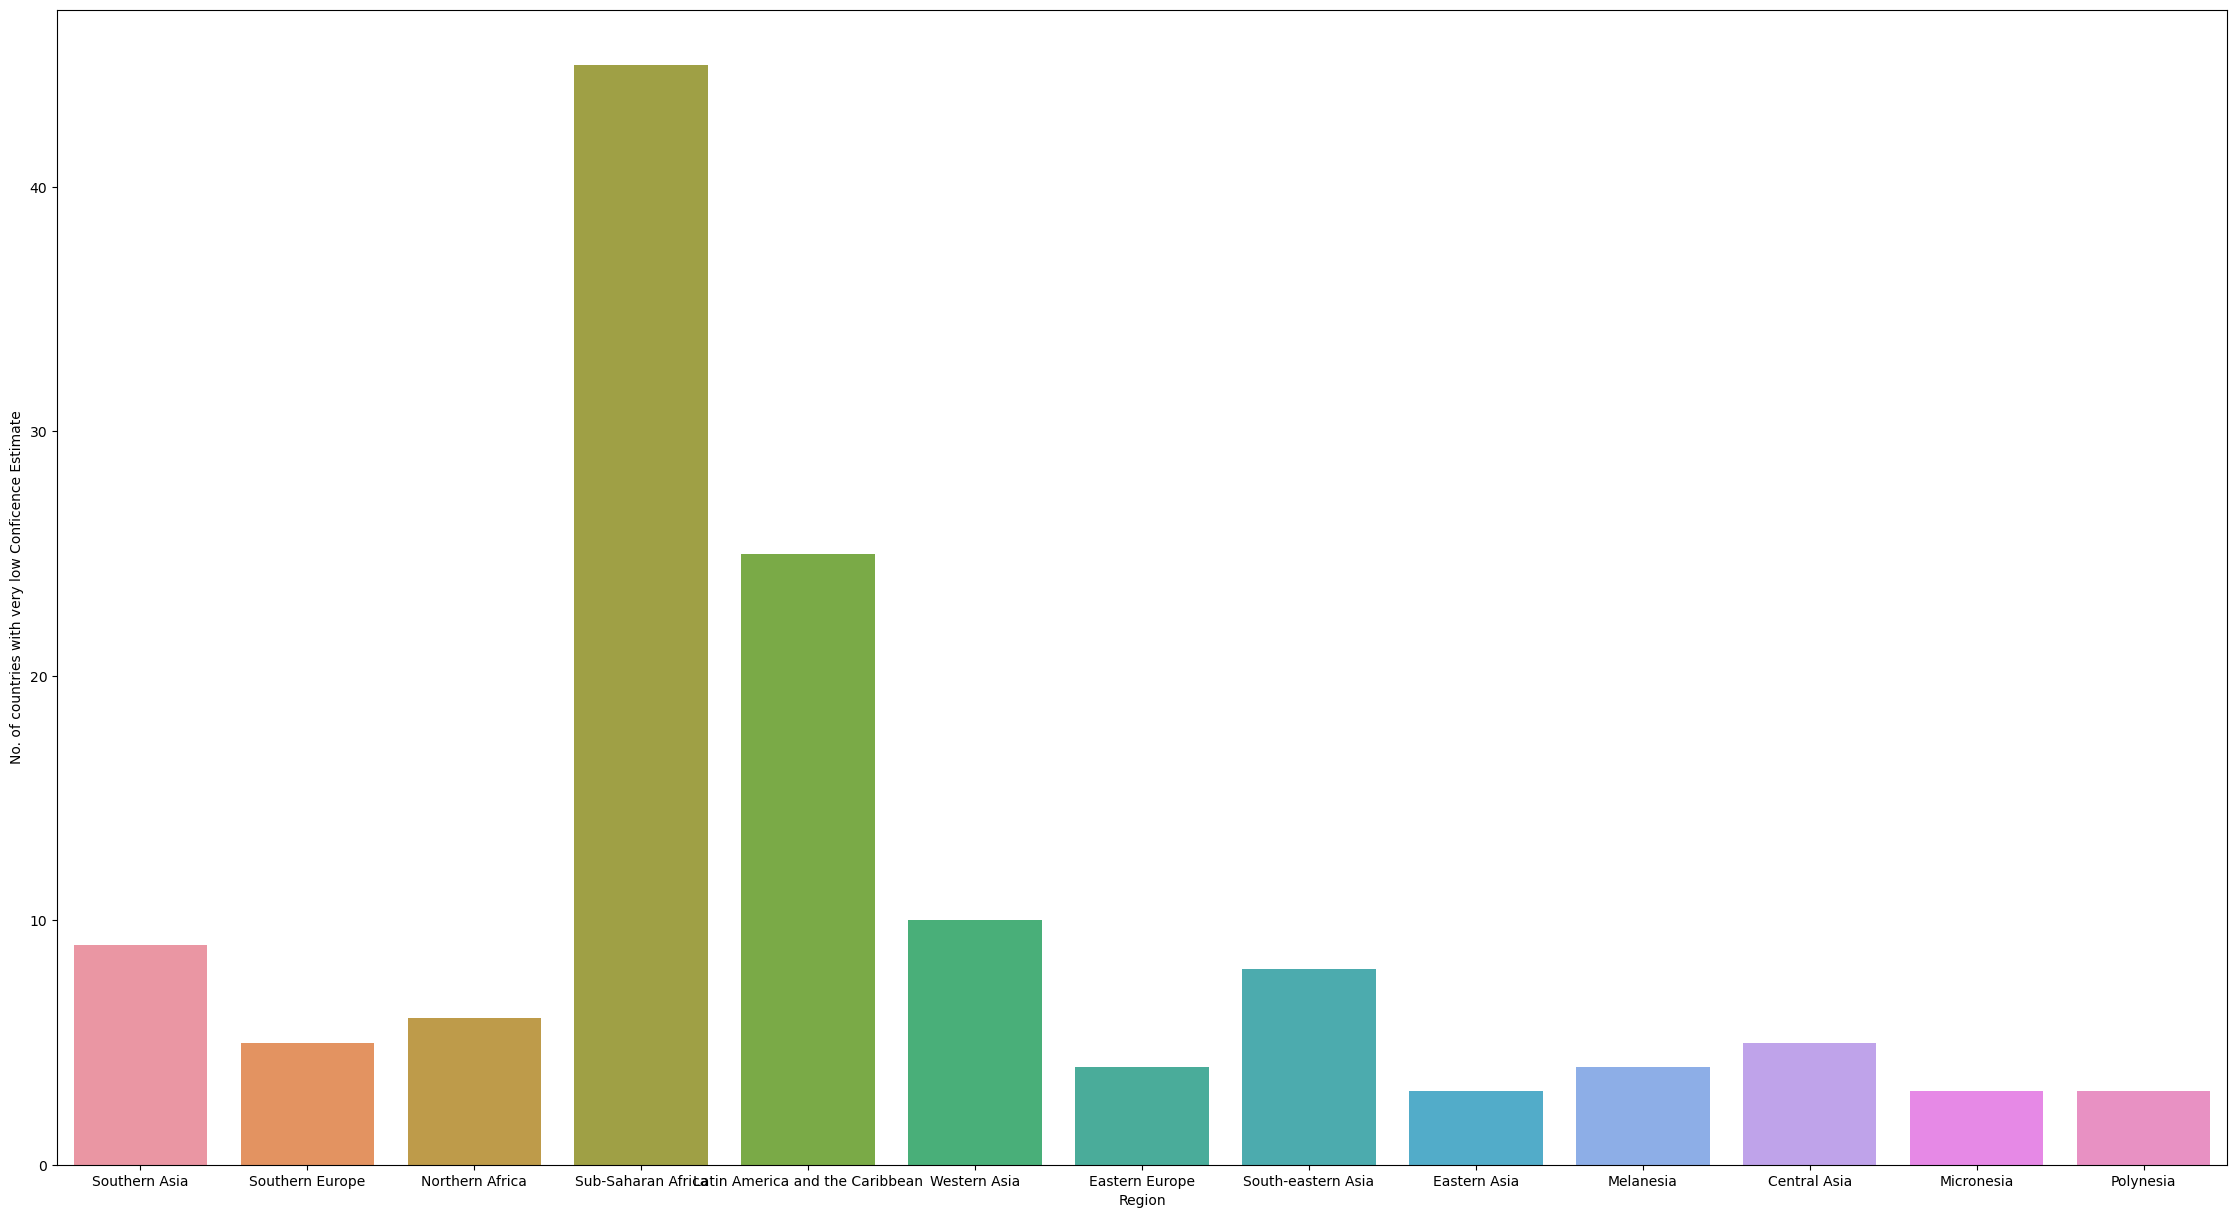

In [24]:
fig = plt.figure(figsize = (28, 15))
sns.countplot(x='Region', data= df_Verylow_CE)
plt.xlabel("Region")
plt.ylabel("No. of countries with very low Conficence Estimate")
plt.show()

**Region vs No. of countries with High Conficence Estimate**

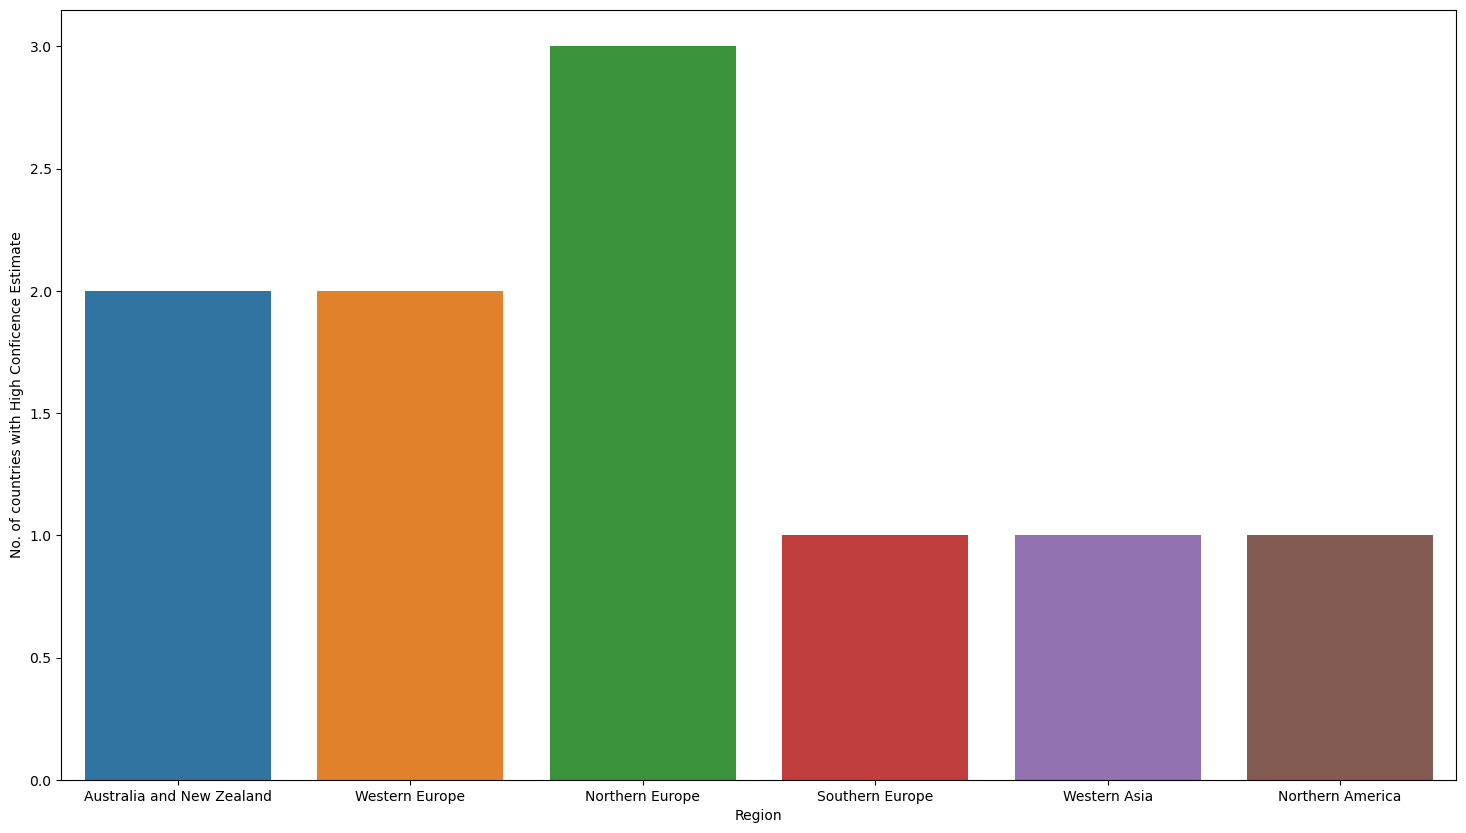

In [25]:
fig = plt.figure(figsize = (18, 10))
sns.countplot(x='Region', data= df_high_CE)
plt.xlabel("Region")
plt.ylabel("No. of countries with High Conficence Estimate")
plt.show()

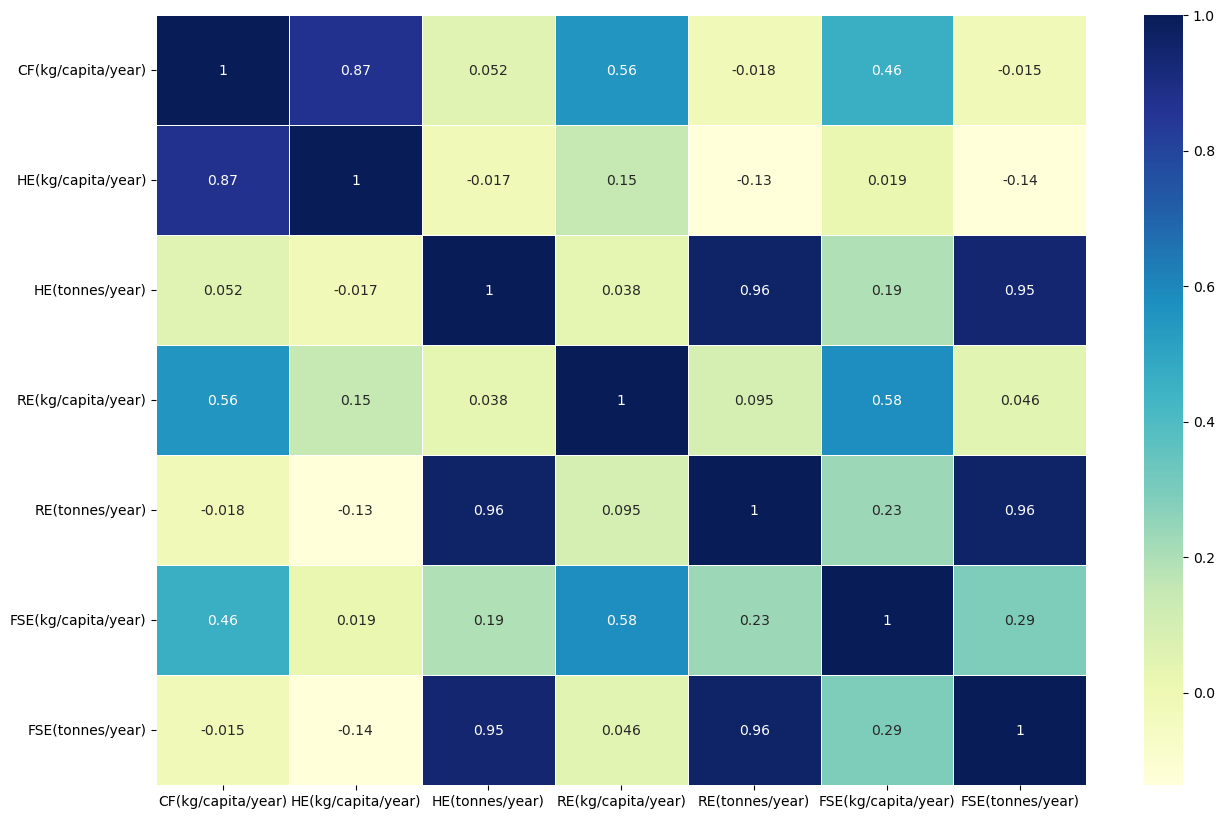

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, linewidths=0.5)
plt.show()

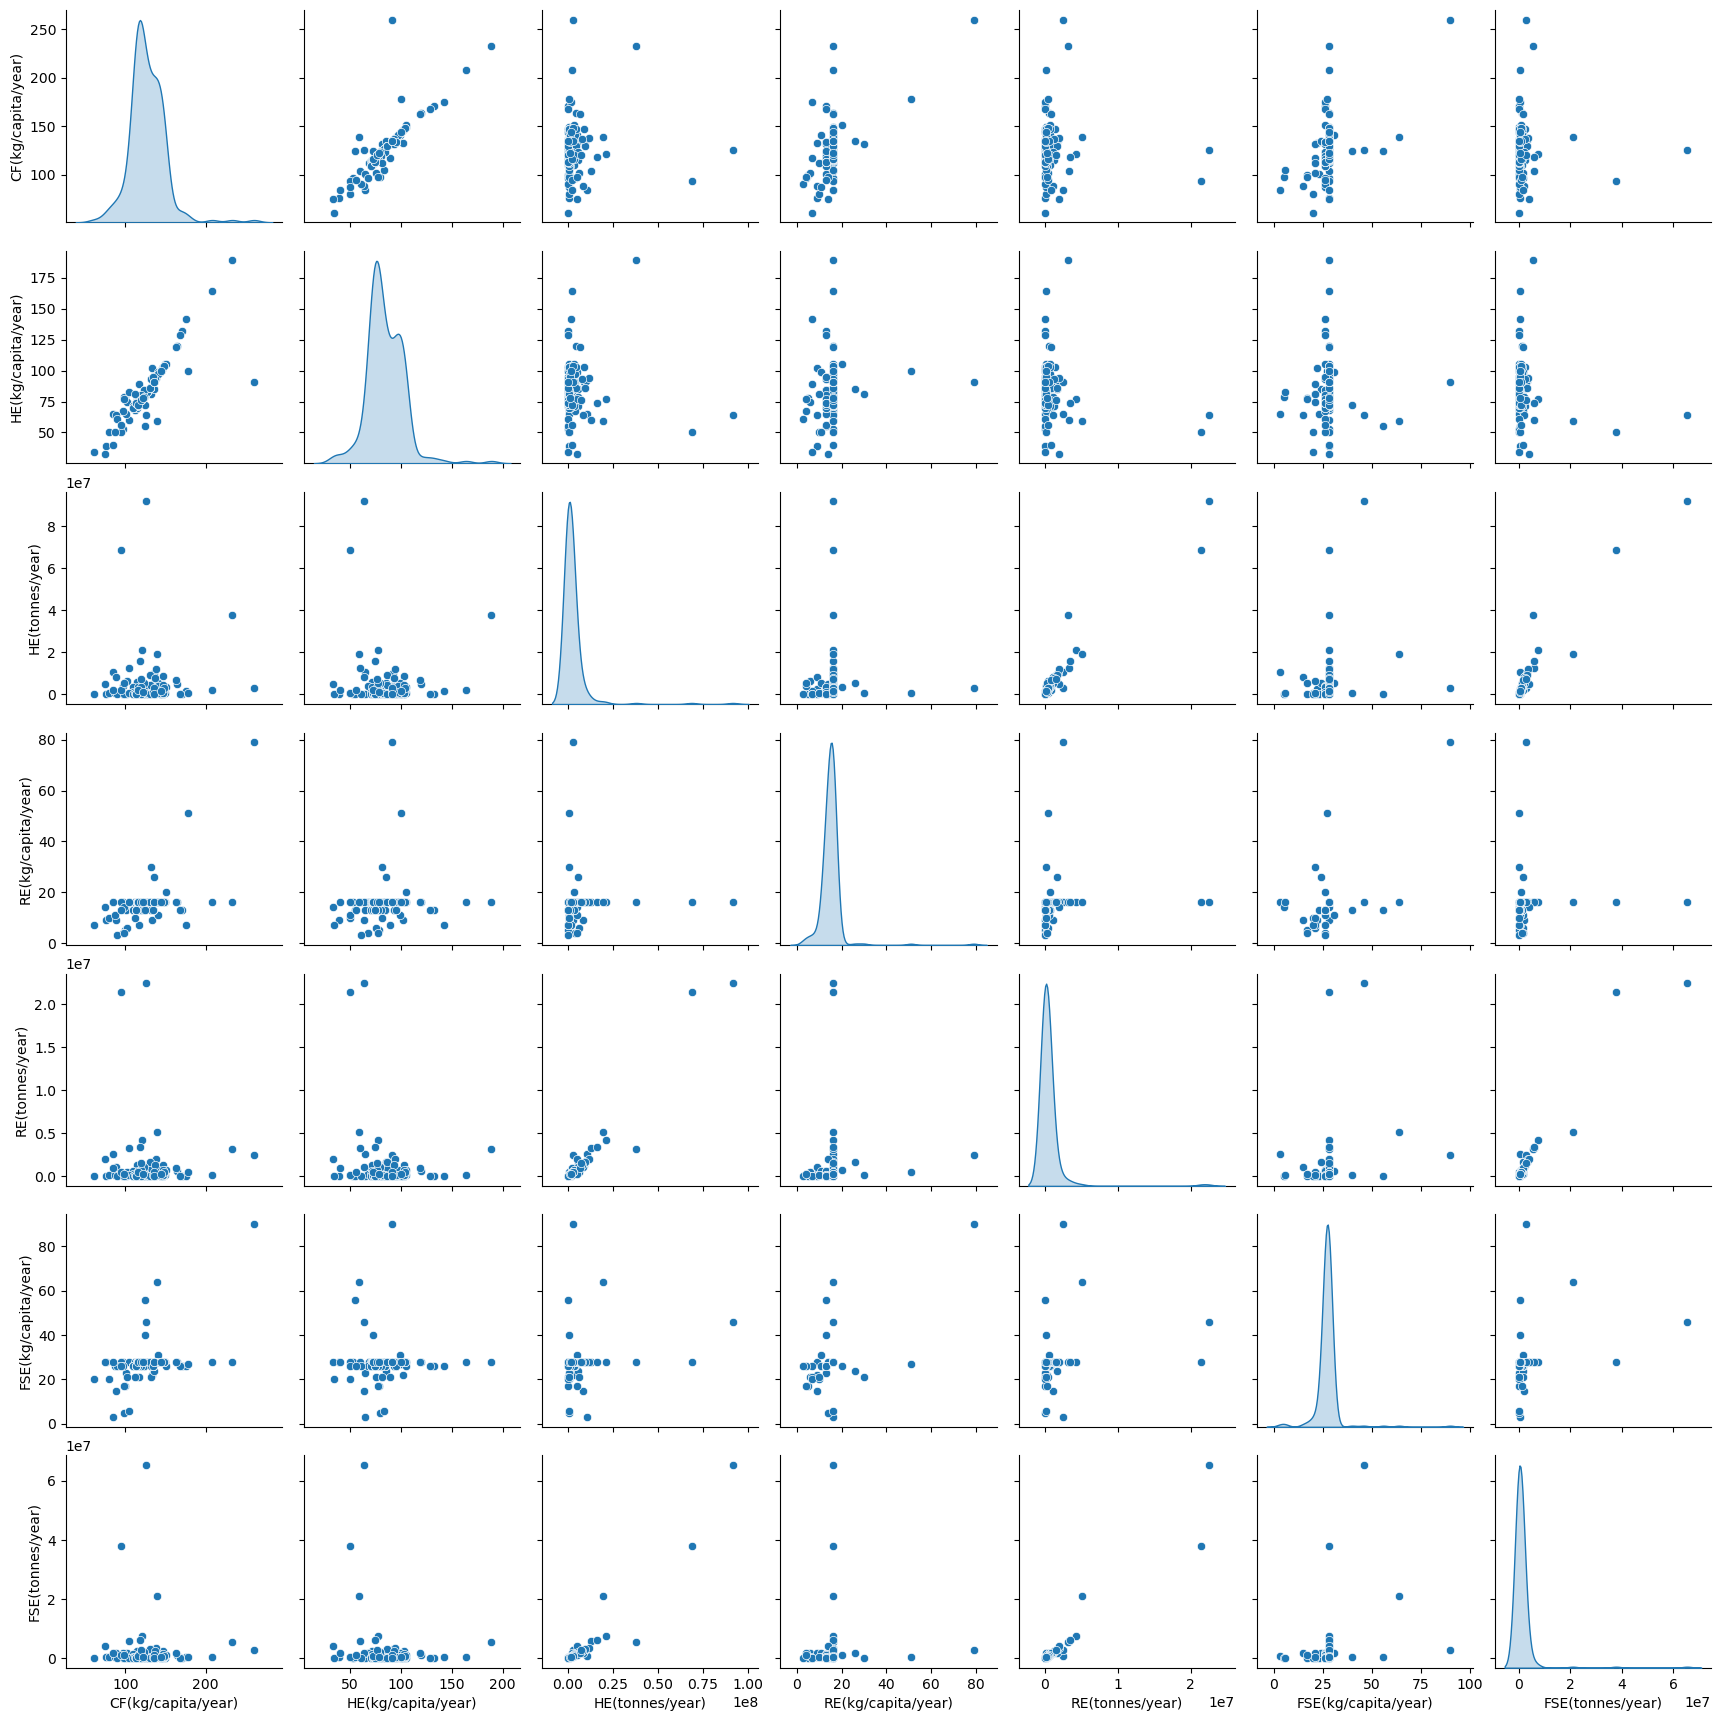

In [27]:
sns.pairplot(data, diag_kind='kde')